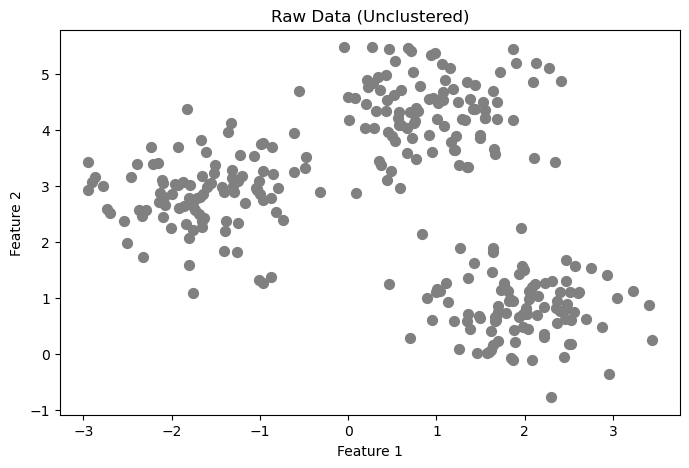

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 1. Generate a synthetic dataset with 3 clear 'blobs' (clusters)
# X contains the features, y contains the true (hidden) labels
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Visualize the raw, unclustered data
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], s=50, color='gray') # s=size of points
plt.title("Raw Data (Unclustered)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
# 2. Instantiate the K-Means model
# n_clusters = k
kmeans = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, random_state=42)

# 3. Fit the model to the data (performs Steps 2 & 3 iteratively)
kmeans.fit(X)

# 4. Get the cluster assignments for each data point
y_kmeans = kmeans.predict(X)

# 5. Get the final coordinates of the centroids
centers = kmeans.cluster_centers_

print("Final Centroid Locations:\n", centers)

C:\Users\chaud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Final Centroid Locations:
 [[-0.33931865  3.61646752]
 [ 1.95542071  0.86038283]]


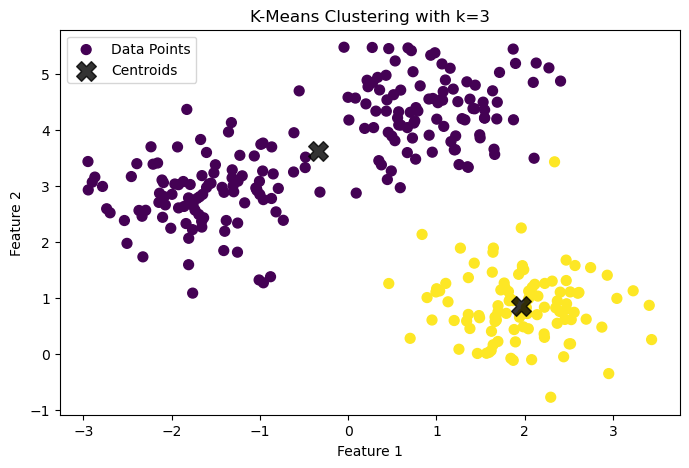

In [5]:
# 6. Plot the clustered data and the final centroids
plt.figure(figsize=(8, 5))

# Plot the points, colored by their assigned cluster
# 'c' uses the cluster assignment as the color index
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Data Points')

# Plot the final centroids (larger, black marks)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8, marker='X', label='Centroids')

plt.title(f"K-Means Clustering with k=3")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

C:\Users\chaud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\chaud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\chaud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\chaud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

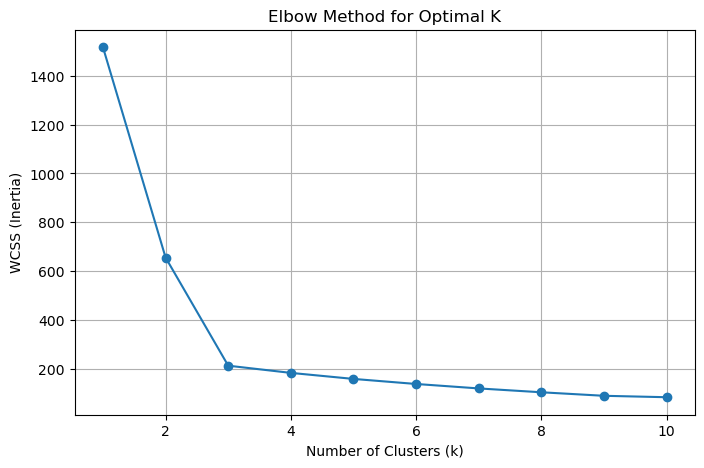

In [6]:
# Using the WCSS (or 'inertia_' in scikit-learn) to find the optimal k
wcss = []
k_range = range(1, 11)

for i in k_range:
    # Train the model for each k
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    # Append the WCSS (inertia) to the list
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()